# **Algoritmos de aprendizaje supervisado - Enrique Palma Bullejos**


---



## **`IMPORTACIÓN DE LIBRERÍAS NECESARIAS`**

In [2]:
# Librerías
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split


## **1) CALIDAD DEL VINO**

## **`PREPROCESO`**

In [6]:
# Importamos nuestro dataset
data_wine = pd.read_csv('data/wine.csv')

# Mostramos las primeras y últimas filas del dataframe
print("Primeras filas\n",data_wine.head())
print("\n********************************\n")
print("Últimas filas\n",data_wine.tail())

Primeras filas
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        

In [7]:
# Mostramos los pará´metros estadísticos de los datos
data_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


<Axes: >

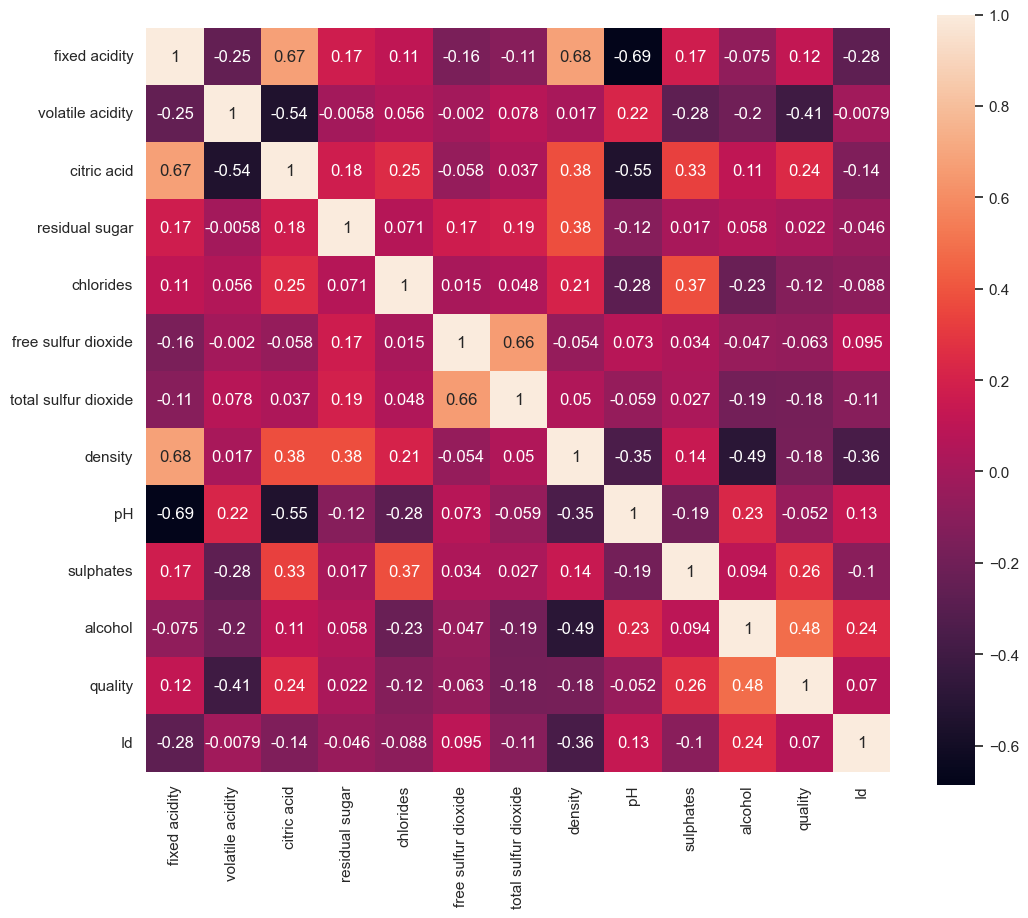

In [8]:
# Mostramos un mapa de calor que indique la correlación entre variables
sns.set()
plt.figure(figsize=(12,10))
sns.heatmap(data_wine.corr(), square=True, annot=True)

### Una vez obtenido el mapa de calor, seleccionamos las características a tener en cuenta para nuestro estudio. En este caso serían:



*   Alcohol (0.48)
*   Sulfatos (0.26)
*   Ácido cítrico (0.24)
*   Acidez volátil (-0.41)



In [ ]:
# Seleccionamos los datos
data_wine_filtered = data_wine[['alcohol', 'sulphates', 'citric acid', 'volatile acidity', 'quality']]
print(data_wine_filtered)

      alcohol  sulphates  citric acid  volatile acidity  quality
0         9.4       0.56         0.00             0.700        5
1         9.8       0.68         0.00             0.880        5
2         9.8       0.65         0.04             0.760        5
3         9.8       0.58         0.56             0.280        6
4         9.4       0.56         0.00             0.700        5
...       ...        ...          ...               ...      ...
1138     11.0       0.75         0.13             0.510        6
1139      9.5       0.82         0.08             0.620        6
1140     10.5       0.58         0.08             0.600        5
1141     11.2       0.76         0.10             0.550        6
1142     10.2       0.71         0.12             0.645        5

[1143 rows x 5 columns]


In [ ]:
# Separamos los datos de entrada y etiquetas
x_data = data_wine_filtered.drop('quality', axis=1)
y_data = data_wine_filtered['quality']

# Separamos los datos de entrenamiento (75%) y de test (25%)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=1)

## **`ENTRENAMIENTO Y PREDICCIÓN`**

In [43]:
# Instanciamos el modelo
model = GaussianNB()

# Entrenamos el modelo con los datos
model.fit(x_train, y_train)

# Predecimos con nuevos datos
y_predict = model.predict(x_test)

**`EVALUACIÓN`**

In [44]:
# Por último, evaluamos el modelo mostrando el porcentaje de elementos clasificados
accuracy_score(y_test, y_predict)

0.6048951048951049

In [47]:
# Mostramos la predicción realizada (variable con la predicción)
y_predict

array([6, 5, 6, 6, 5, 7, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6,
       5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 7, 5, 5, 5, 6, 5, 5, 5, 7, 6, 7, 6,
       5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6,
       5, 5, 6, 4, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5,
       5, 6, 5, 7, 6, 7, 5, 5, 6, 7, 6, 5, 6, 7, 5, 6, 5, 7, 6, 5, 5, 6,
       6, 5, 5, 5, 7, 6, 5, 5, 6, 7, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 7, 7, 5, 5, 6, 5, 5, 5, 7, 5, 5, 7, 5, 6, 5, 6, 7, 5, 5, 4,
       5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 7, 5, 7, 5, 7, 5, 7, 5, 6,
       5, 6, 6, 7, 7, 7, 6, 7, 5, 5, 7, 6, 5, 7, 7, 5, 6, 5, 6, 6, 5, 5,
       3, 5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 7, 7, 6, 5, 6, 6,
       6, 6, 5, 5, 6, 7, 7, 6, 6, 5, 5, 5, 7, 6, 5, 6, 5, 5, 5, 7, 5, 5,
       5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 7, 5,
       5, 5, 5, 5, 5, 4, 6, 5, 6, 7, 6, 6, 6, 6, 7, 6, 6, 5, 5, 5, 6, 5])

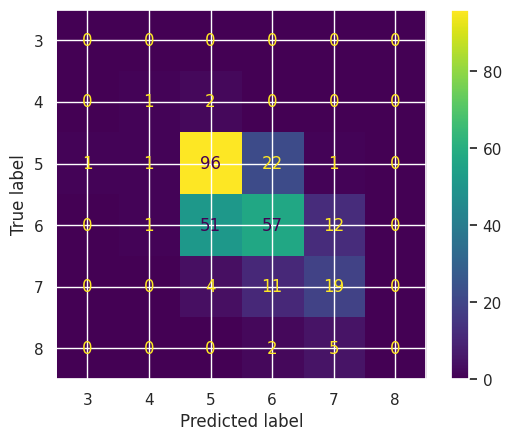

In [53]:
# Representamos gráficamente la clasificación obtenida
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

## **2) PRESENCIA DE ENFERMEDAD DEL CORAZÓN**

## **`PREPROCESO`**

In [11]:
# Importamos nuestro dataset
data_heart = pd.read_csv('data/heart.csv')

# Mostramos las primeras y últimas filas del dataframe
print("Primeras filas\n",data_heart.head())
print("\n********************************\n")
print("Últimas filas\n",data_heart.tail())

Primeras filas
    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

********************************

Últimas filas
      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0    

In [12]:
# Mostramos los pará´metros estadísticos de los datos
data_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<Axes: >

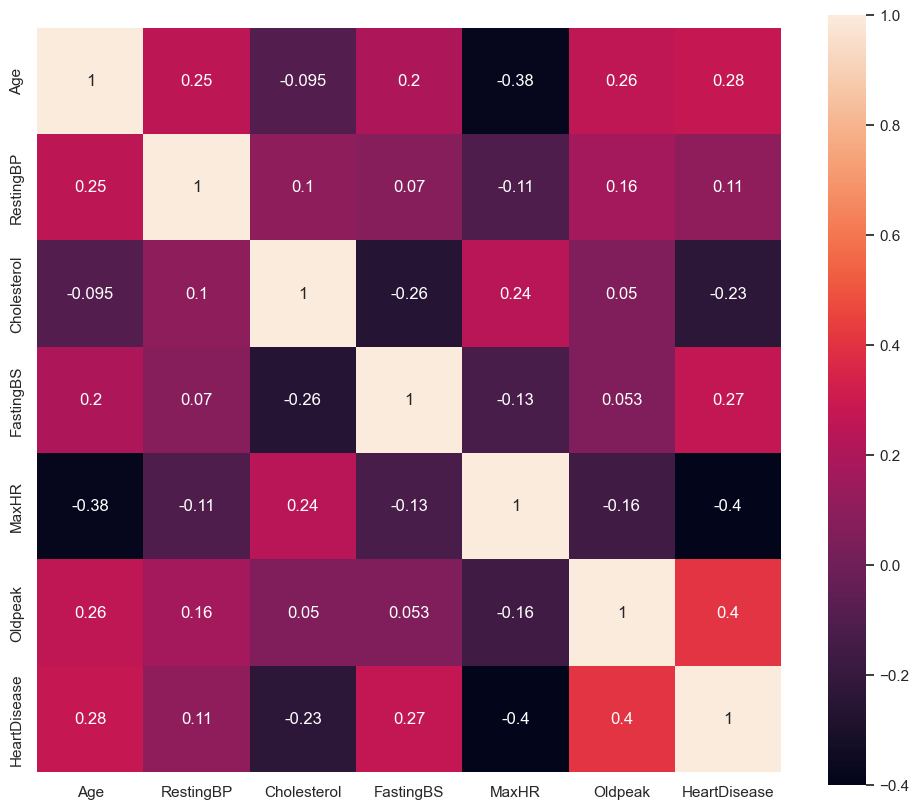

In [30]:
# Mostramos un mapa de calor que indique la correlación entre variables
# En este caso, disponemos de valores alfanuméricos, y la función corr() solo calcula la correlación entre columnas numéricas
# Para ello, vamos a seleccionar únicamente las columnas numéricas:

data_heart_numeric = data_heart.select_dtypes(include=['number'])

sns.set()
plt.figure(figsize=(12,10))
sns.heatmap(data_heart_numeric.corr(), square=True, annot=True)

### Una vez obtenido el mapa de calor, seleccionamos las características a tener en cuenta para nuestro estudio. En este caso serían:



*   FastingBS (0.27)
*   Age (0.28)
*   Oldpeak (0.4)
*   MaxHR (-0.4)

In [31]:
# Seleccionamos los datos
data_heart_filtered = data_heart_numeric[['FastingBS', 'Age', 'Oldpeak', 'MaxHR', 'HeartDisease']]
print(data_heart_filtered)

     FastingBS  Age  Oldpeak  MaxHR  HeartDisease
0            0   40      0.0    172             0
1            0   49      1.0    156             1
2            0   37      0.0     98             0
3            0   48      1.5    108             1
4            0   54      0.0    122             0
..         ...  ...      ...    ...           ...
913          0   45      1.2    132             1
914          1   68      3.4    141             1
915          0   57      1.2    115             1
916          0   57      0.0    174             1
917          0   38      0.0    173             0

[918 rows x 5 columns]


In [32]:
# Separamos los datos de entrada y etiquetas
x_heart_data = data_heart_filtered.drop('HeartDisease', axis=1)
y_heart_data = data_heart_filtered['HeartDisease']

# Separamos los datos de entrenamiento (75%) y de test (25%)
x_heart_train, x_heart_test, y_heart_train, y_heart_test = train_test_split(x_heart_data, y_heart_data, test_size=0.25, random_state=1)

## **`ENTRENAMIENTO Y PREDICCIÓN`**

In [33]:
# Instanciamos el modelo
model = GaussianNB()

# Entrenamos el modelo con los datos
model.fit(x_heart_train, y_heart_train)

# Predecimos con nuevos datos
y_heart_predict = model.predict(x_heart_test)

In [34]:
# Por último, evaluamos el modelo mostrando el porcentaje de elementos clasificados
accuracy_score(y_heart_test, y_heart_predict)

0.7913043478260869

In [35]:
# Mostramos la predicción realizada (variable con la predicción)
y_heart_predict

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

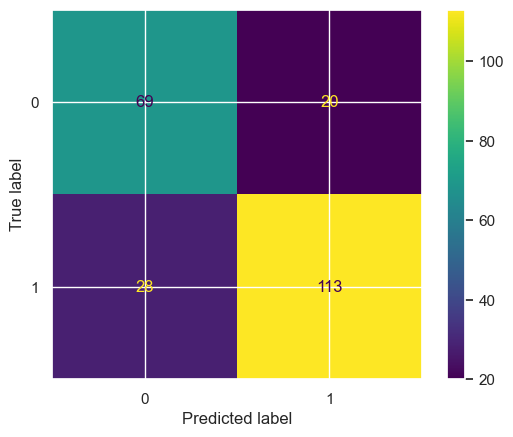

In [36]:
# Representamos gráficamente la clasificación obtenida
ConfusionMatrixDisplay.from_predictions(y_heart_test, y_heart_predict)